In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.clustering import silhouette_score
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

import keras
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Bank Reserves

In [47]:
br_inputs = pd.read_csv("~/Desktop/TS-Clustering/SimData/bank_reserves_inputs.csv", header=None)
br_inputs_arr = br_inputs.iloc[:, 0].to_numpy()

In [48]:
labels_df = pd.read_json("~/Desktop/TS-Clustering/daep_labels_agglom_centroid.ndjson", lines=True)
method = "daep"      
abm = "BR"          
k = 7                #

row = labels_df[(labels_df["method"] == method) &
                (labels_df["abm"] == abm) &
                (labels_df["k"] == k)]

if not row.empty:
    labels = row.iloc[0]["labels"]
    print(f"Loaded {len(labels)} labels for {method.upper()} ({abm}), k={k}")
else:
    print("No matching entry found.")

Loaded 100000 labels for DAEP (BR), k=7


In [50]:
pd.Series(labels).value_counts()

2    0.43360
3    0.27768
1    0.10599
6    0.05135
5    0.04659
0    0.04316
4    0.04163
Name: proportion, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(br_inputs, labels, test_size=0.1, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [52]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
report = classification_report(y_test, ypred)
print("Report:",)
print (report)
acc = accuracy_score(y_test,ypred)
print("Accuracy:",acc)

Confusion Matrix:
[[ 298    0    0    0   69   64    0]
 [   0  881    0   87    1    0   75]
 [   0    0 4264    0    0   62    0]
 [   0   99    0 2735    0    0    0]
 [  68    0    0    0  271    0   77]
 [  49    0   92    0    0  297    0]
 [   2   94    0    0   73    0  342]]
Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       431
           1       0.82      0.84      0.83      1044
           2       0.98      0.99      0.98      4326
           3       0.97      0.97      0.97      2834
           4       0.65      0.65      0.65       416
           5       0.70      0.68      0.69       438
           6       0.69      0.67      0.68       511

    accuracy                           0.91     10000
   macro avg       0.79      0.78      0.79     10000
weighted avg       0.91      0.91      0.91     10000

Accuracy: 0.9088


C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6545 - loss: 1.6874 - val_accuracy: 0.7076 - val_loss: 0.6872
Epoch 2/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7194 - loss: 0.6510 - val_accuracy: 0.7293 - val_loss: 0.5656
Epoch 3/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7694 - loss: 0.5429 - val_accuracy: 0.8046 - val_loss: 0.4951
Epoch 4/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8091 - loss: 0.4729 - val_accuracy: 0.8234 - val_loss: 0.4422
Epoch 5/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8376 - loss: 0.4176 - val_accuracy: 0.8504 - val_loss: 0.3927
Epoch 6/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8534 - loss: 0.3827 - val_accuracy: 0.8624 - val_loss: 0.3609
Epoch 7/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8697 - loss: 0.3515 - val_accuracy: 0.8763 - val_loss: 0.3403
Epoch 8/500
7200/7200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8773 - loss: 0

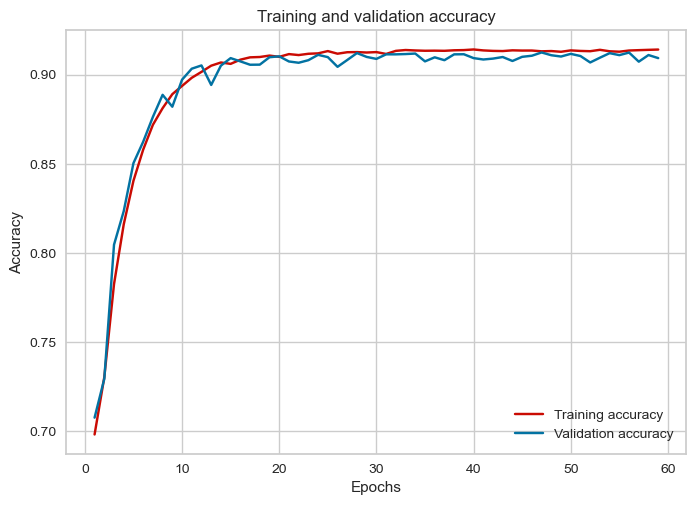

In [53]:
import matplotlib.pyplot as plt
X = X_train
Y = y_train
dummy_y = to_categorical(Y)

model = Sequential()
model.add(Dense(8, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True)

history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=500, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

preds = model.predict(X) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

In [54]:
preds = model.predict(X_test) 
print("Report:",)
print(classification_report(y_test, preds.argmax(axis=1)))
acc = accuracy_score(y_test,preds.argmax(axis=1))
print("Accuracy:",acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       431
           1       0.85      0.84      0.85      1044
           2       0.98      0.98      0.98      4326
           3       0.97      0.97      0.97      2834
           4       0.73      0.53      0.61       416
           5       0.74      0.74      0.74       438
           6       0.69      0.76      0.72       511

    accuracy                           0.92     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.92      0.92      0.92     10000

Accuracy: 0.9172


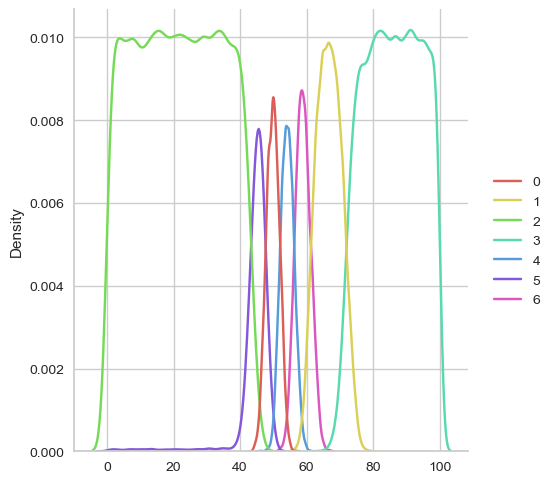

In [55]:
plt = sns.displot(x=br_inputs_arr, hue=labels, kind="kde", palette=sns.color_palette("hls", 7))

# Epstein Civil Violence

In [56]:
ecv_inputs = pd.read_csv("~/Desktop/TS-Clustering/SimData/epsteinCV_inputs.csv", header=None, sep=' ')
ecv_inputs_arr = ecv_inputs.iloc[:, 0].to_numpy()

In [57]:
labels_df = pd.read_json("~/Desktop/TS-Clustering/daep_labels_agglom_centroid.ndjson", lines=True)
method = "daep"      
abm = "ECV"          
k = 8                #

row = labels_df[(labels_df["method"] == method) &
                (labels_df["abm"] == abm) &
                (labels_df["k"] == k)]

if not row.empty:
    labels = row.iloc[0]["labels"]
    print(f"Loaded {len(labels)} labels for {method.upper()} ({abm}), k={k}")
else:
    print("No matching entry found.")

Loaded 50362 labels for DAEP (ECV), k=8


In [61]:
pd.Series(labels).value_counts()

0    42123
4     4692
2     1668
1      677
3      502
5      374
6      254
7       72
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(ecv_inputs, labels, test_size=0.1, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [14]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
report = classification_report(y_test, ypred)
print("Report:",)
print (report)
acc = accuracy_score(y_test,ypred)
print("Accuracy:",acc)

Confusion Matrix:
[[4162    1   35    6    4    0    1    1]
 [   3   25   12    0   35    6    0    0]
 [  48   11   92    1    5    7    0    0]
 [  14    0    0   24    6    0    2    0]
 [   5   17   11    3  426    0    0    0]
 [   2   10   18    0    6    1    0    0]
 [  13    0    1    8    2    0    4    0]
 [   3    0    0    0    6    0    0    0]]
Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4210
           1       0.39      0.31      0.34        81
           2       0.54      0.56      0.55       164
           3       0.57      0.52      0.55        46
           4       0.87      0.92      0.89       462
           5       0.07      0.03      0.04        37
           6       0.57      0.14      0.23        28
           7       0.00      0.00      0.00         9

    accuracy                           0.94      5037
   macro avg       0.50      0.43      0.45      5037
weighted avg       0.93      0.94

In [66]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

X_train_raw, X_val, y_train_raw, y_val = train_test_split(
    ecv_inputs, labels, 
    test_size=0.2, 
    stratify=labels,
    random_state=42)

sm = SMOTE(k_neighbors=3, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_raw, y_train_raw)

pd.Series(y_train_res).value_counts()

0    33698
4    33698
1    33698
2    33698
7    33698
3    33698
5    33698
6    33698
Name: count, dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)

In [70]:
from tensorflow.keras.utils import to_categorical

num_classes = len(pd.Series(labels).unique())
y_train_cat = to_categorical(y_train_res, num_classes)
y_val_cat   = to_categorical(y_val, num_classes)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_res,
    y_train_cat,
    validation_data=(X_val_scaled, y_val_cat),
    epochs=200,
    batch_size=512,
    callbacks=[es],
    shuffle=True,
    verbose=1
)

Epoch 1/200


C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4739 - loss: 1.3596 - val_accuracy: 0.8959 - val_loss: 0.2665
Epoch 2/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7509 - loss: 0.6411 - val_accuracy: 0.9140 - val_loss: 0.2422
Epoch 3/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7686 - loss: 0.5922 - val_accuracy: 0.9176 - val_loss: 0.2332
Epoch 4/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7774 - loss: 0.5710 - val_accuracy: 0.9166 - val_loss: 0.2307
Epoch 5/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7812 - loss: 0.5589 - val_accuracy: 0.9156 - val_loss: 0.2419
Epoch 6/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7828 - loss: 0.5545 - val_accuracy: 0.9182 - val_loss: 0.2347
Epoch 7/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7855 - loss: 0.5467 - val_accuracy: 0.9196 - val_loss: 0.2303
Epoch 8/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7877 - loss: 0.5406 - val_accuracy: 0.9226

In [77]:
val_preds = model.predict(X_val_scaled).argmax(axis=1)

print(confusion_matrix(y_val, val_preds))
print(classification_report(y_val, val_preds, digits=4))

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
[[8079    0  181    6    0    3  122   34]
 [   0   90    4    0    5   31    0    5]
 [   5   14  201    1    1   74   10   28]
 [   0    0    0   73    4    0   19    4]
 [   0   78    0   39  769    5    4   44]
 [   0   19   19    0    0   35    0    2]
 [   0    0    0   10    0    0   35    6]
 [   0    0    0    2    1    0    0   11]]
              precision    recall  f1-score   support

           0     0.9994    0.9589    0.9787      8425
           1     0.4478    0.6667    0.5357       135
           2     0.4963    0.6018    0.5440       334
           3     0.5573    0.7300    0.6320       100
           4     0.9859    0.8190    0.8947       939
           5     0.2365    0.4667    0.3139        75
           6     0.1842    0.6863    0.2905        51
           7     0.0821    0.7857    0.1486        14

    accuracy                         0.9226     10073
   macro avg     0.4987    0.7144    0.5423     10073
weighted avg    

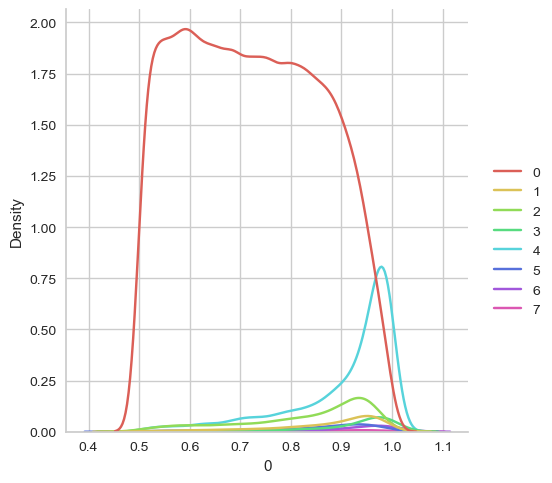

In [17]:
plt = sns.displot(x=ecv_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))

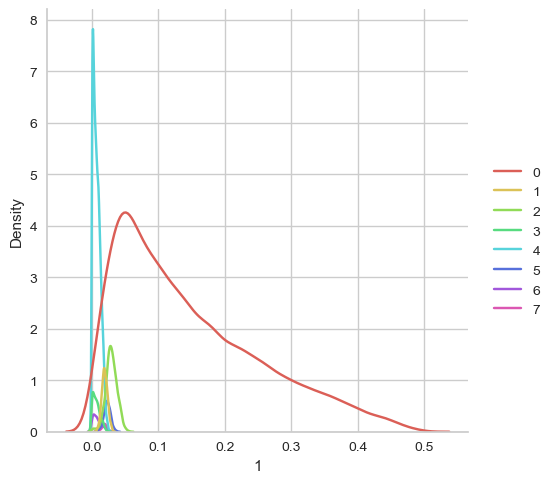

In [18]:
plt = sns.displot(x=ecv_inputs[1], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))

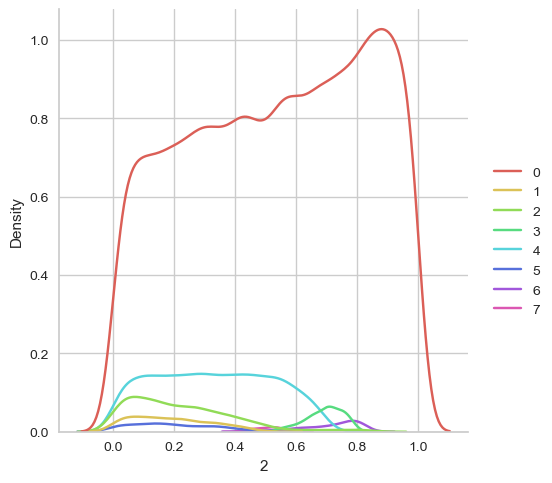

In [19]:
plt = sns.displot(x=ecv_inputs[2], hue=labels, kind="kde", palette=sns.color_palette("hls", 8))

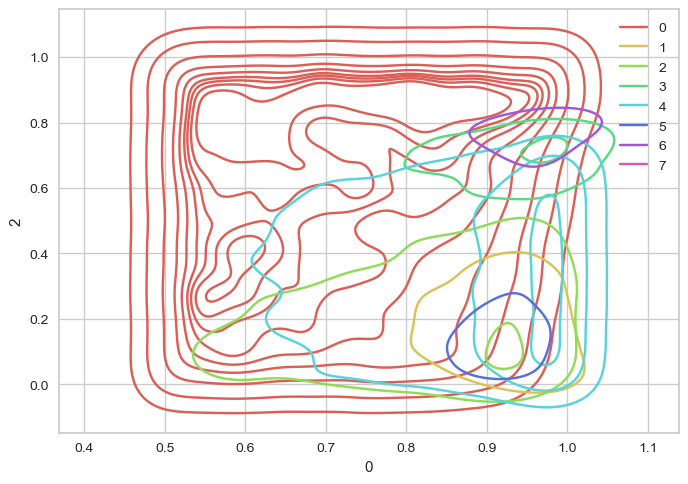

In [21]:
plt = sns.kdeplot(x=ecv_inputs[0], y=ecv_inputs[2], hue=labels, palette=sns.color_palette("hls", 8))

In [28]:
ecv_inputs['labels'] = labels

In [30]:
ecvinputslt1 = ecv_inputs[ecv_inputs.iloc[:, 1] < 0.1]

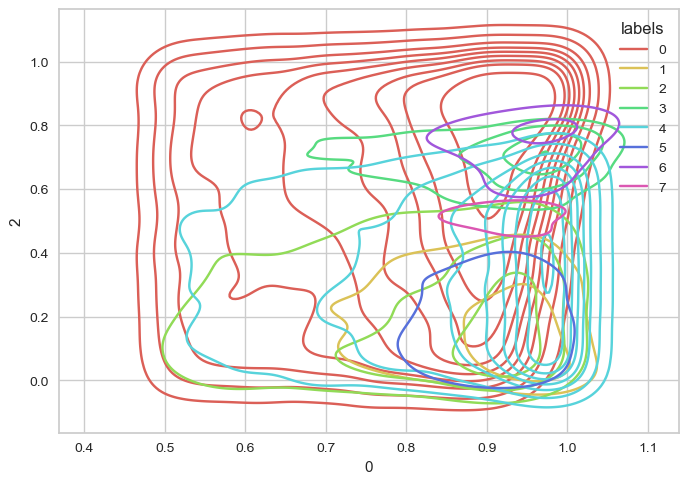

In [31]:
plt = sns.kdeplot(x=ecvinputslt1[0], y=ecvinputslt1[2], hue=ecvinputslt1['labels'], palette=sns.color_palette("hls", 8))

# Forest Fire

In [92]:
ff_inputs = pd.read_csv("~/Desktop/TS-Clustering/SimData/forest_fire_inputs.csv", header=None, sep=' ')
ff_inputs_arr = ff_inputs.iloc[:, 0].to_numpy()

In [93]:
labels_df = pd.read_json("~/Desktop/TS-Clustering/daep_labels_agglom_centroid.ndjson", lines=True)
method = "daep"      
abm = "FF"          
k = 4                #

row = labels_df[(labels_df["method"] == method) &
                (labels_df["abm"] == abm) &
                (labels_df["k"] == k)]

if not row.empty:
    labels = row.iloc[0]["labels"]
    print(f"Loaded {len(labels)} labels for {method.upper()} ({abm}), k={k}")
else:
    print("No matching entry found.")

Loaded 100000 labels for DAEP (FF), k=4


In [94]:
pd.Series(labels).value_counts()

1    58446
0    40415
2      724
3      415
Name: count, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(ff_inputs, labels, test_size=0.1, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [96]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
report = classification_report(y_test, ypred)
print("Report:",)
print (report)
acc = accuracy_score(y_test,ypred)
print("Accuracy:",acc)

Confusion Matrix:
[[4041   37   16    3]
 [  32 5745    2    1]
 [  52   15    4    2]
 [  24   24    2    0]]
Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4097
           1       0.99      0.99      0.99      5780
           2       0.17      0.05      0.08        73
           3       0.00      0.00      0.00        50

    accuracy                           0.98     10000
   macro avg       0.53      0.51      0.51     10000
weighted avg       0.97      0.98      0.97     10000

Accuracy: 0.979


In [97]:
X_train_raw, X_val, y_train_raw, y_val = train_test_split(
    ff_inputs, labels,
    test_size=0.2,
    stratify = labels,
    random_state=42)

In [98]:
sm = SMOTE(k_neighbors=3, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_raw, y_train_raw)

In [99]:
pd.Series(y_train_res).value_counts()

1    46757
0    46757
2    46757
3    46757
Name: count, dtype: int64

In [100]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)

In [101]:
num_classes = len(pd.Series(labels).unique())
y_train_cat = to_categorical(y_train_res, num_classes)
y_val_cat   = to_categorical(y_val, num_classes)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_res,
    y_train_cat,
    validation_data=(X_val_scaled, y_val_cat),
    epochs=200,
    batch_size=512,
    callbacks=[es],
    shuffle=True,
    verbose=1
)

Epoch 1/200


C:\Users\met48\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6589 - loss: 0.8654 - val_accuracy: 0.9320 - val_loss: 0.1940
Epoch 2/200
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7651 - loss: 0.4639 - val_accuracy: 0.9445 - val_loss: 0.1718
Epoch 3/200
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7685 - loss: 0.4546 - val_accuracy: 0.9420 - val_loss: 0.1844
Epoch 4/200
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7677 - loss: 0.4558 - val_accuracy: 0.9463 - val_loss: 0.1725
Epoch 5/200
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7684 - loss: 0.4513 - val_accuracy: 0.9457 - val_loss: 0.1732
Epoch 6/200
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7687 - loss: 0.4514 - val_accuracy: 0.9475 - val_loss: 0.1645
Epoch 7/200
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7702 - loss: 0.4492 - val_accuracy: 0.9431 - val_loss: 0.1806
Epoch 8/200
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7709 - loss: 0.4464 - val_accuracy: 0.9444

In [103]:
val_preds = model.predict(X_val_scaled).argmax(axis=1)

print(confusion_matrix(y_val, val_preds))
print(classification_report(y_val, val_preds, digits=4))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step
[[ 7526     0   401   156]
 [    4 11266    64   355]
 [    1     1    64    79]
 [    0     1    17    65]]
              precision    recall  f1-score   support

           0     0.9993    0.9311    0.9640      8083
           1     0.9998    0.9638    0.9815     11689
           2     0.1172    0.4414    0.1852       145
           3     0.0992    0.7831    0.1762        83

    accuracy                         0.9460     20000
   macro avg     0.5539    0.7799    0.5767     20000
weighted avg     0.9895    0.9460    0.9653     20000



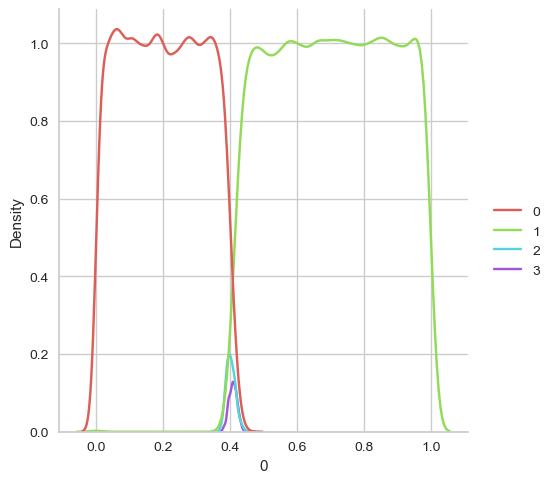

In [104]:
plt = sns.displot(x=ff_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 4))

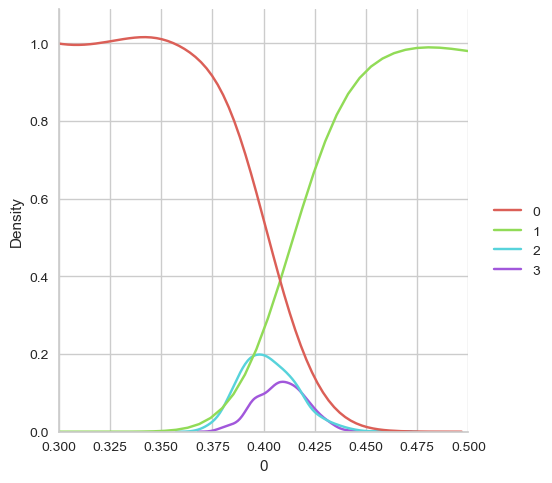

In [105]:
plt = sns.displot(x=ff_inputs[0], hue=labels, kind="kde", palette=sns.color_palette("hls", 4))
plt.set(xlim=(0.3, 0.5))